# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [11]:
# imports
import pandas as pd
import numpy as np
# from google.colab import drive
# drive.mount('/gdrive')


In [12]:
ruta = "C:\\Users\\josan\\Documents\\GitHub\\EDEM_MDA2324\\Alumnos\\ES\\Josan_Rodrigo_Cortes\\Machine_learning\\EntregablesHechos\\dataset_banco (2).csv"
data= pd.read_csv(ruta,delimiter=',')

In [13]:
print(data.shape)
data.head(11)

(45207, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

Vamos a empezar mostrando que variables contiene nuestro dataset, el tipo de variable y los valores no nulo que contienen.

In [14]:
## A completar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


A priori, parece que tenemos pocos datos nulos. Vamos a analizar en profundidad las variables para determinarlo.

Puesto que vamos a aplicar diferentes técnicas para las variables numéricas y categóricas, vamos a realizar el análisis de las mismas por separado.

## Analisis univariado de las variables categóricas:

In [15]:
descripcion_categorica = data.describe(include=['object'])
print(pd.DataFrame(descripcion_categorica))

                job  marital  education default housing   loan    contact  \
count         45207    45207      45207   45207   45207  45207      45207   
unique           12        3          4       2       2      2          3   
top     blue-collar  married  secondary      no     yes     no  telephone   
freq           9730    27211      23198   44391   25125  37963      32183   

        month poutcome      y  
count   45207    45207  45207  
unique     12        4      2  
top       may  unknown     no  
freq    13760    36958  39919  


In [16]:
# Distribución de los datos en las variables categóricas:

for columna in data.columns:
    if pd.api.types.is_object_dtype(data[columna]): 
        valores_unicos = data[columna].unique()
        num_valores_unicos = data[columna].nunique()
        print(f"Número de valores únicos en la columna '{columna}': {num_valores_unicos}")
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Número de valores únicos en la columna 'job': 12
Valores únicos en la columna 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Número de valores únicos en la columna 'marital': 3
Valores únicos en la columna 'marital': ['married' 'single' 'divorced']
Número de valores únicos en la columna 'education': 4
Valores únicos en la columna 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Número de valores únicos en la columna 'default': 2
Valores únicos en la columna 'default': ['no' 'yes']
Número de valores únicos en la columna 'housing': 2
Valores únicos en la columna 'housing': ['yes' 'no']
Número de valores únicos en la columna 'loan': 2
Valores únicos en la columna 'loan': ['no' 'yes']
Número de valores únicos en la columna 'contact': 3
Valores únicos en la columna 'contact': ['unknown' 'telephone' 'mobile phone']
Número de valores únicos en la columna 'month': 12
V

Como podemos ver al obtener los valores únicos de cada variable, hay bastantes variables cuyos niveles necesitan ser estandarizados a un valor común que represente el verdadero nivel al que pertenece.


In [17]:
# Para la columna job:
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
managmen_replace={'Management':'management','MANAGEMENT':'management'}
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
data['job'] = data['job'].replace(managmen_replace, regex=False)
data['job'] = data['job'].str.replace('Self-employed', 'self-employed', regex=False)
data['job'] = data['job'].str.replace('Services', 'services', regex=False)
data['job'] = data['job'].str.replace( 'Retired',  'retired', regex=False)

# Para la columna marital:
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
data['marital'] = data['marital'].str.replace('DIVORCED','divorced' , regex=False)
data['marital'] = data['marital'].str.replace('Single','single', regex=False)


# Para la columna education:
secondary_replacements={'sec.':'secondary','SECONDARY':'secondary','Secondary':'secondary'}
data['education'] = data['education'].replace(secondary_replacements, regex=False)
data['education'] = data['education'].str.replace('Tertiary','tertiary', regex=False)
data['education'] = data['education'].str.replace('Primary','primary', regex=False)
data.loc[data['education']=='UNK','education'] = 'unknown'

# Para la columna loan:
loan_replacements={'NO':'no','No':'no','YES':'yes','Yes':'yes'}
data['loan'] = data['loan'].replace(loan_replacements, regex=False)

# Para la columna contact:
contact_replacements={'cellular':'telephone','phone':'telephone','mobile':'mobile phone'}
data['contact'] = data['contact'].replace(contact_replacements, regex=False)

# Para la columna poutcome reemplazamos 'unk' por 'unknown'.
# Lo intento con el método siguiente pero no consigue que cambie los valores, uso el data.loc
# poutcome_replacements={'UNK':'unknown','Success':'success'}
# data['poutcome'] = data['poutcome'].replace(contact_replacements, regex=False)
data.loc[data['poutcome']=='UNK','poutcome']='unknown'
data.loc[data['poutcome']=='Success','poutcome']='success'

# Imprimimos de nuevo los resultados:

for columna in data.columns:
    if pd.api.types.is_object_dtype(data[columna]): 
        valores_unicos = data[columna].unique()
        num_valores_unicos = data[columna].nunique()
        print(f"Número de valores únicos en la columna '{columna}': {num_valores_unicos}")
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Número de valores únicos en la columna 'job': 12
Valores únicos en la columna 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Número de valores únicos en la columna 'marital': 3
Valores únicos en la columna 'marital': ['married' 'single' 'divorced']
Número de valores únicos en la columna 'education': 4
Valores únicos en la columna 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Número de valores únicos en la columna 'default': 2
Valores únicos en la columna 'default': ['no' 'yes']
Número de valores únicos en la columna 'housing': 2
Valores únicos en la columna 'housing': ['yes' 'no']
Número de valores únicos en la columna 'loan': 2
Valores únicos en la columna 'loan': ['no' 'yes']
Número de valores únicos en la columna 'contact': 3
Valores únicos en la columna 'contact': ['unknown' 'telephone' 'mobile phone']
Número de valores únicos en la columna 'month': 12
V

Ahora si tenemos los niveles de las variables categóricas homogeneizados.

Reemplazamos los 'unknown' por nan, puesto que significa lo mismo y contamos su número para cada variable.

Las mostrarmos un gráfico de barras:

In [18]:
data=data.replace('unknown',np.nan)

In [19]:
nan_counts= data.isna().sum()
nan_counts

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13021
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36958
y                0
dtype: int64

Como podemos ver hay variables de nuestro dataset que contienen un número de nan´s muy elevado. Deberemos decidir posteriormente que hacemos con ellos, especialemente si el objeto de la limpieza es entrenar un modelo de ML.

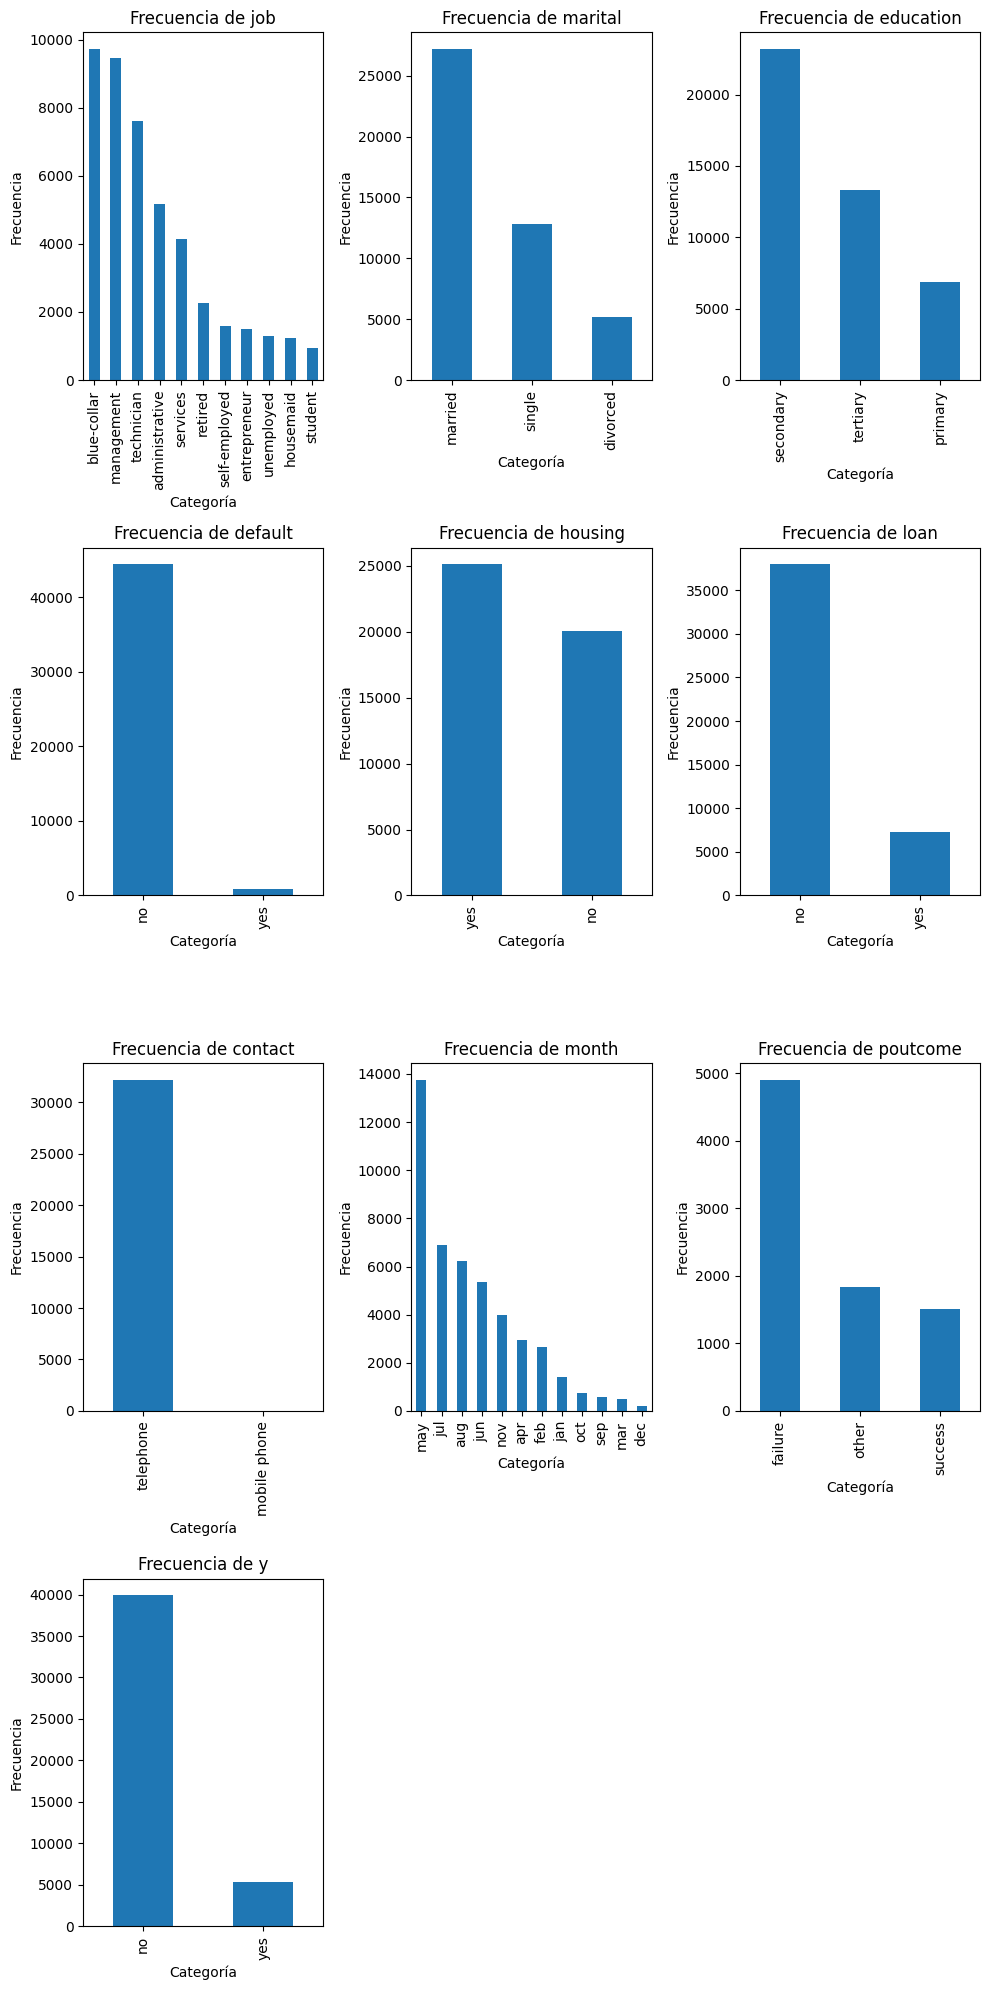

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suponiendo que data es tu DataFrame
# Lista de columnas categóricas
columnas_categoricas = [col for col in data.columns if pd.api.types.is_object_dtype(data[col])]

# Determinar el número de filas y columnas para la cuadrícula
n_cols = 3  # Por ejemplo, definir 2 columnas
n_rows = np.ceil(len(columnas_categoricas) / n_cols).astype(int)  # Calcular el número de filas necesario

# Configuración de la figura para múltiples subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5 * n_rows))  # Ajusta el tamaño según sea necesario

# Aplanar el array de axes si es necesario
axes = axes.flatten()

# Bucle para crear un gráfico para cada columna
for i, columna in enumerate(columnas_categoricas):
    frecuencia = data[columna].value_counts()
    frecuencia.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frecuencia de {columna}')
    axes[i].set_xlabel('Categoría')
    axes[i].set_ylabel('Frecuencia')

# Si hay más subplots que columnas categóricas, esconder los subplots extras
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



A partir de la visualización anterior podemos ver que: 

- Job esta desbalanceada, tenemos trabajos mucho más representados que otros, siendo blue-collar el más frecuente.
- Housing esta bastante balanceada.
- Education, está desbalanceada, y secondary es la catagoría más frecuente.
- Default, está muy desbalanceada, siendo el contacto por telefono fijo el mayoritario.
- Las frecuencias de month tampoco estan homogéneamente distribuidas, tenemos meses de muchos contactos y meses de muy pocos.
- Poutcome desbalanceada.
- Y la variable objetivo también está desbalanceada, lo cual es lógico.

## Variables numéricas:

In [21]:
descripcion_numerica = data.describe(include=['float64', 'int64'])
print(descripcion_numerica)

                age        balance           day      duration      campaign  \
count  45207.000000   45207.000000  45207.000000  45207.000000  45207.000000   
mean      41.005596    1374.201318     15.806534    258.032539      2.763731   
std       12.037399    3924.491665      8.323015    257.460759      3.098058   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1427.500000     21.000000    319.000000      3.000000   
max      776.000000  527532.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45207.000000  45207.000000  
mean      40.178225      0.580198  
std      100.103283      2.303341  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

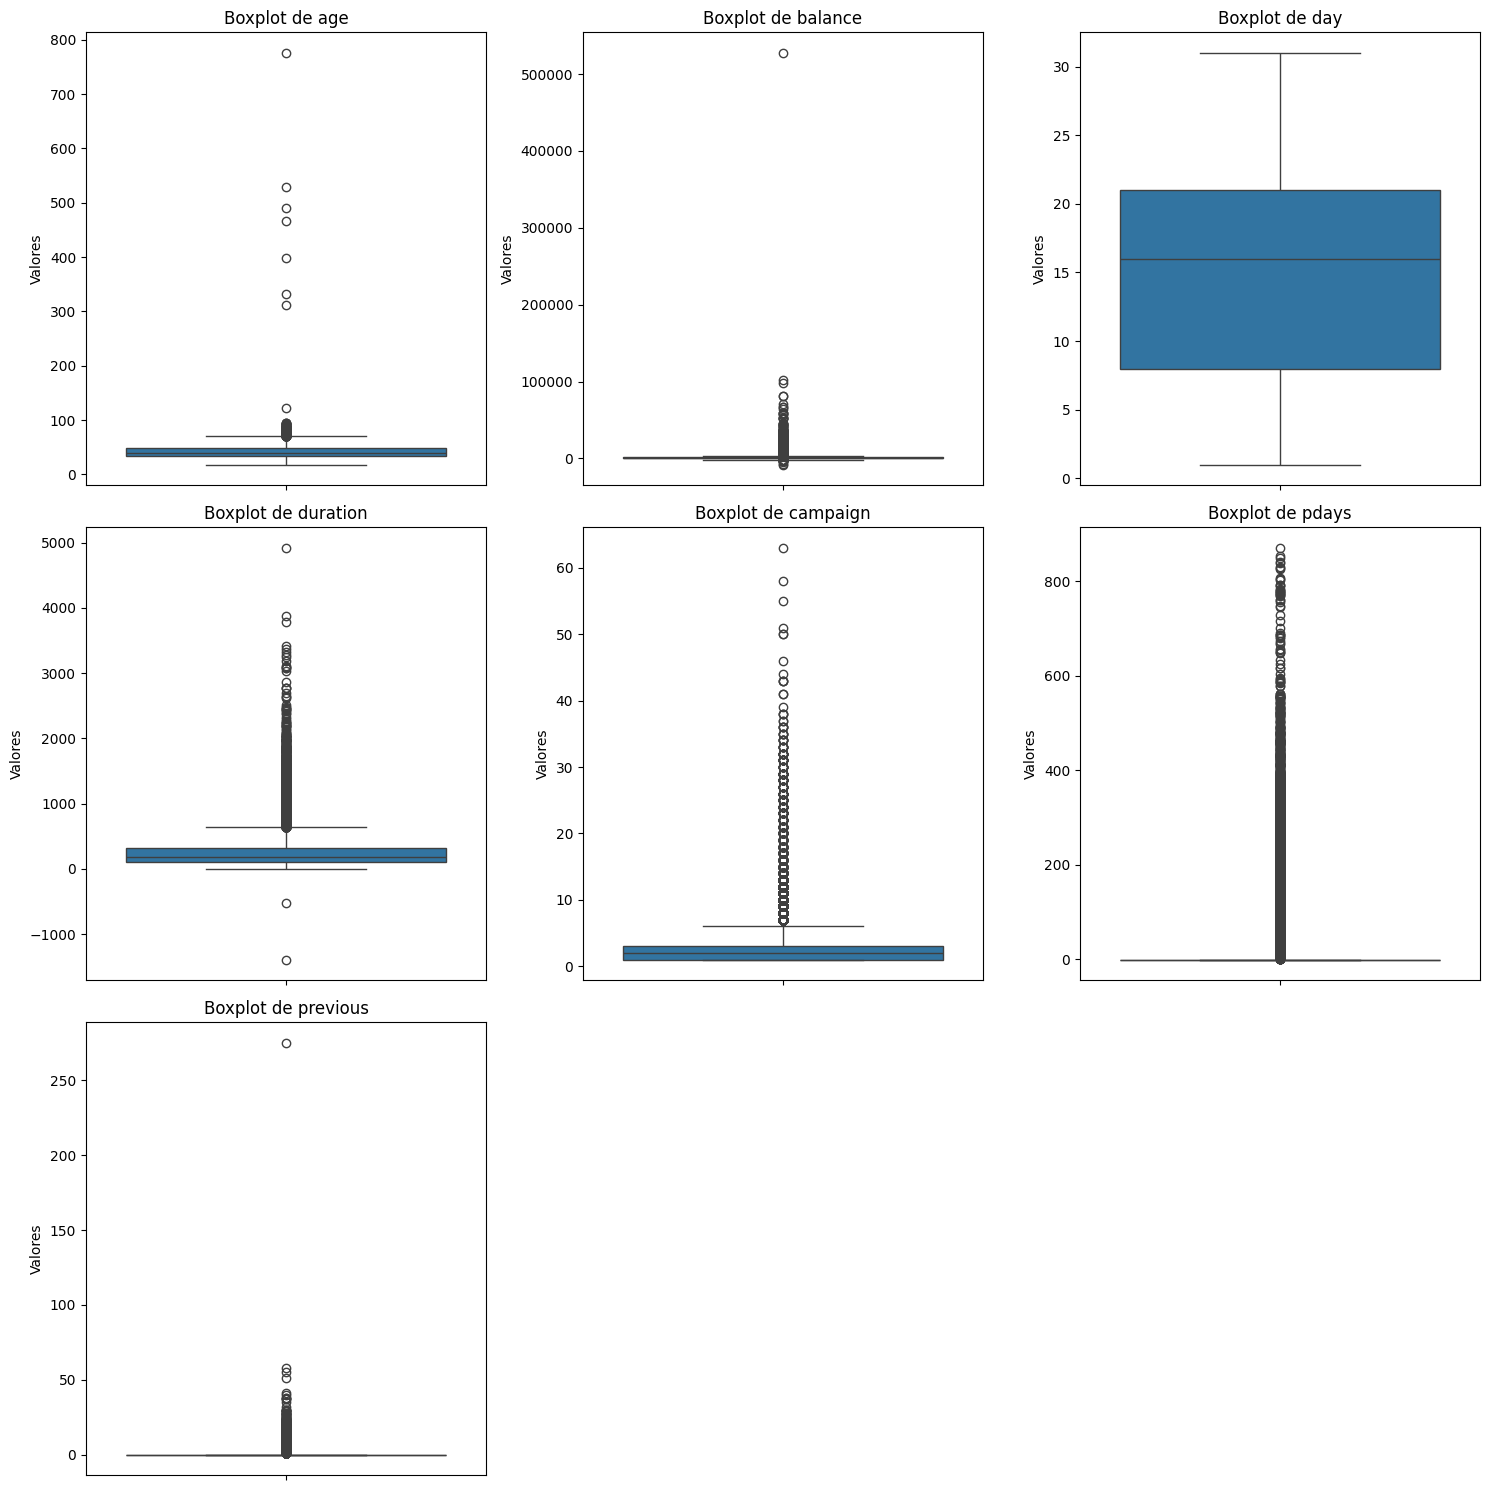

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suponiendo que 'data' es tu DataFrame
# Identificar columnas con datos numéricos que generalmente son candidatos para ser considerados continuos
columnas_continuas = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular dimensiones de la cuadrícula
n_vars = len(columnas_continuas)
n_cols = 3 # Número de columnas en la cuadrícula
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcular número de filas necesarias

# Configurar la figura para múltiples subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Aplanar el array de axes para un fácil acceso

# Verificar si solo hay una columna continua para ajustar la indexación de axes
if n_vars == 1:
    axes = [axes]  # Hacer axes iterable

# Paso 2: Crear Boxplots para Cada Variable Continua
for ax, columna in zip(axes, columnas_continuas):
    sns.boxplot(y=data[columna], ax=ax)  # Usar 'y' para boxplots verticales
    ax.set_title(f'Boxplot de {columna}')
    ax.set_ylabel('Valores')

# Ocultar subplots extras si los hay
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()



De los gráficos anteriores podemos ver que:

- Hay 8 valores extremos en la columna edad mayores que 100 años que deberemos ajustar o eliminar.
- Hay un valor de balance muy alto, que aunque puede ser cierto, distorsiona enormemente la varianza real del resto de los datos. Tendremos que decidir que hacemos con el.
- La variable día, no toma valores extraños, que tengamos que tratar.
- Los valores extremos de duration, pdays, campaign y previus, aunque pueden distorsionar la distribución de la variable, no podemos descartarlos porque son o pueden ser reales. Ahora bien, en el caso particular de duration, no tiene sentido que tome valores negativos y los eliminaremos. No es el caso de pdays, donde -1 nos indica que esa persona, no fue contactada previamente.


In [23]:
for columna in data.columns:
    if not pd.api.types.is_object_dtype(data[columna]): 
        valores_unicos = np.sort(data[columna].unique())
        num_valores_unicos = data[columna].nunique()
        print(f"Número de valores únicos en la columna '{columna}': {num_valores_unicos}")
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Número de valores únicos en la columna 'age': 85
Valores únicos en la columna 'age': [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  92  93  94  95 123 311 332 399 466 490 530 776]
Número de valores únicos en la columna 'balance': 7168
Valores únicos en la columna 'balance': [ -8019.  -6847.  -4057. ...  98417. 102127. 527532.]
Número de valores únicos en la columna 'day': 31
Valores únicos en la columna 'day': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Número de valores únicos en la columna 'duration': 1573
Valores únicos en la columna 'duration': [-1389.  -517.     0. ...  3785.  3881.  4918.]
Número de valores únicos en la columna 'campaign': 48
Valores únicos en la columna 'campaign':

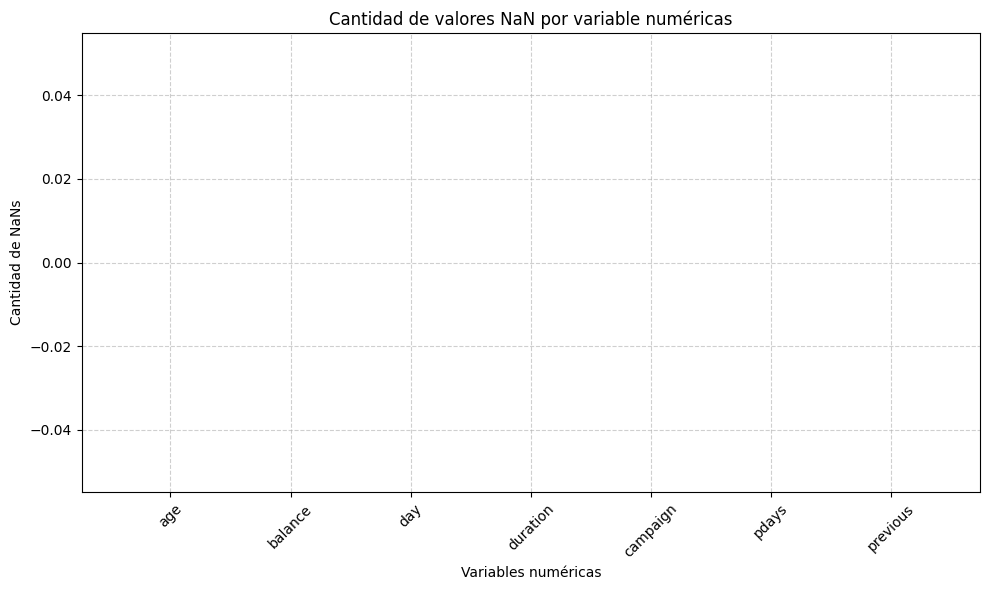

In [24]:

# Lista para almacenar los recuentos de NaNs
nan_counts = []

# Lista para almacenar los nombres de las columnas categóricas
columnas_categoricas = []

# Bucle para iterar sobre cada columna y verificar si es categórica
for columna in data.columns:
    if not pd.api.types.is_object_dtype(data[columna]):
        columnas_categoricas.append(columna)
        nan_counts.append(data[columna].isna().sum())

# Crear un DataFrame a partir de las listas para facilitar la visualización
df_nans = pd.DataFrame({'Columna': columnas_categoricas, 'NaNs': nan_counts})

# Configurar gráfico
plt.figure(figsize=(10, 6))  # Ajustar tamaño según la cantidad de columnas
plt.bar(df_nans['Columna'], df_nans['NaNs'], color='skyblue')  # Crear gráfico de barras
plt.title('Cantidad de valores NaN por variable numéricas')
plt.xlabel('Variables numéricas')
plt.ylabel('Cantidad de NaNs')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula para facilidad de lectura

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [25]:
# Convertimos los valores de "age">100 a nan
data.loc[data['age'] > 100, 'age'] = np.nan

In [26]:
# Convertimos los valores de "duration"<0 a nan
data.loc[data['duration'] < 0, 'duration'] = np.nan

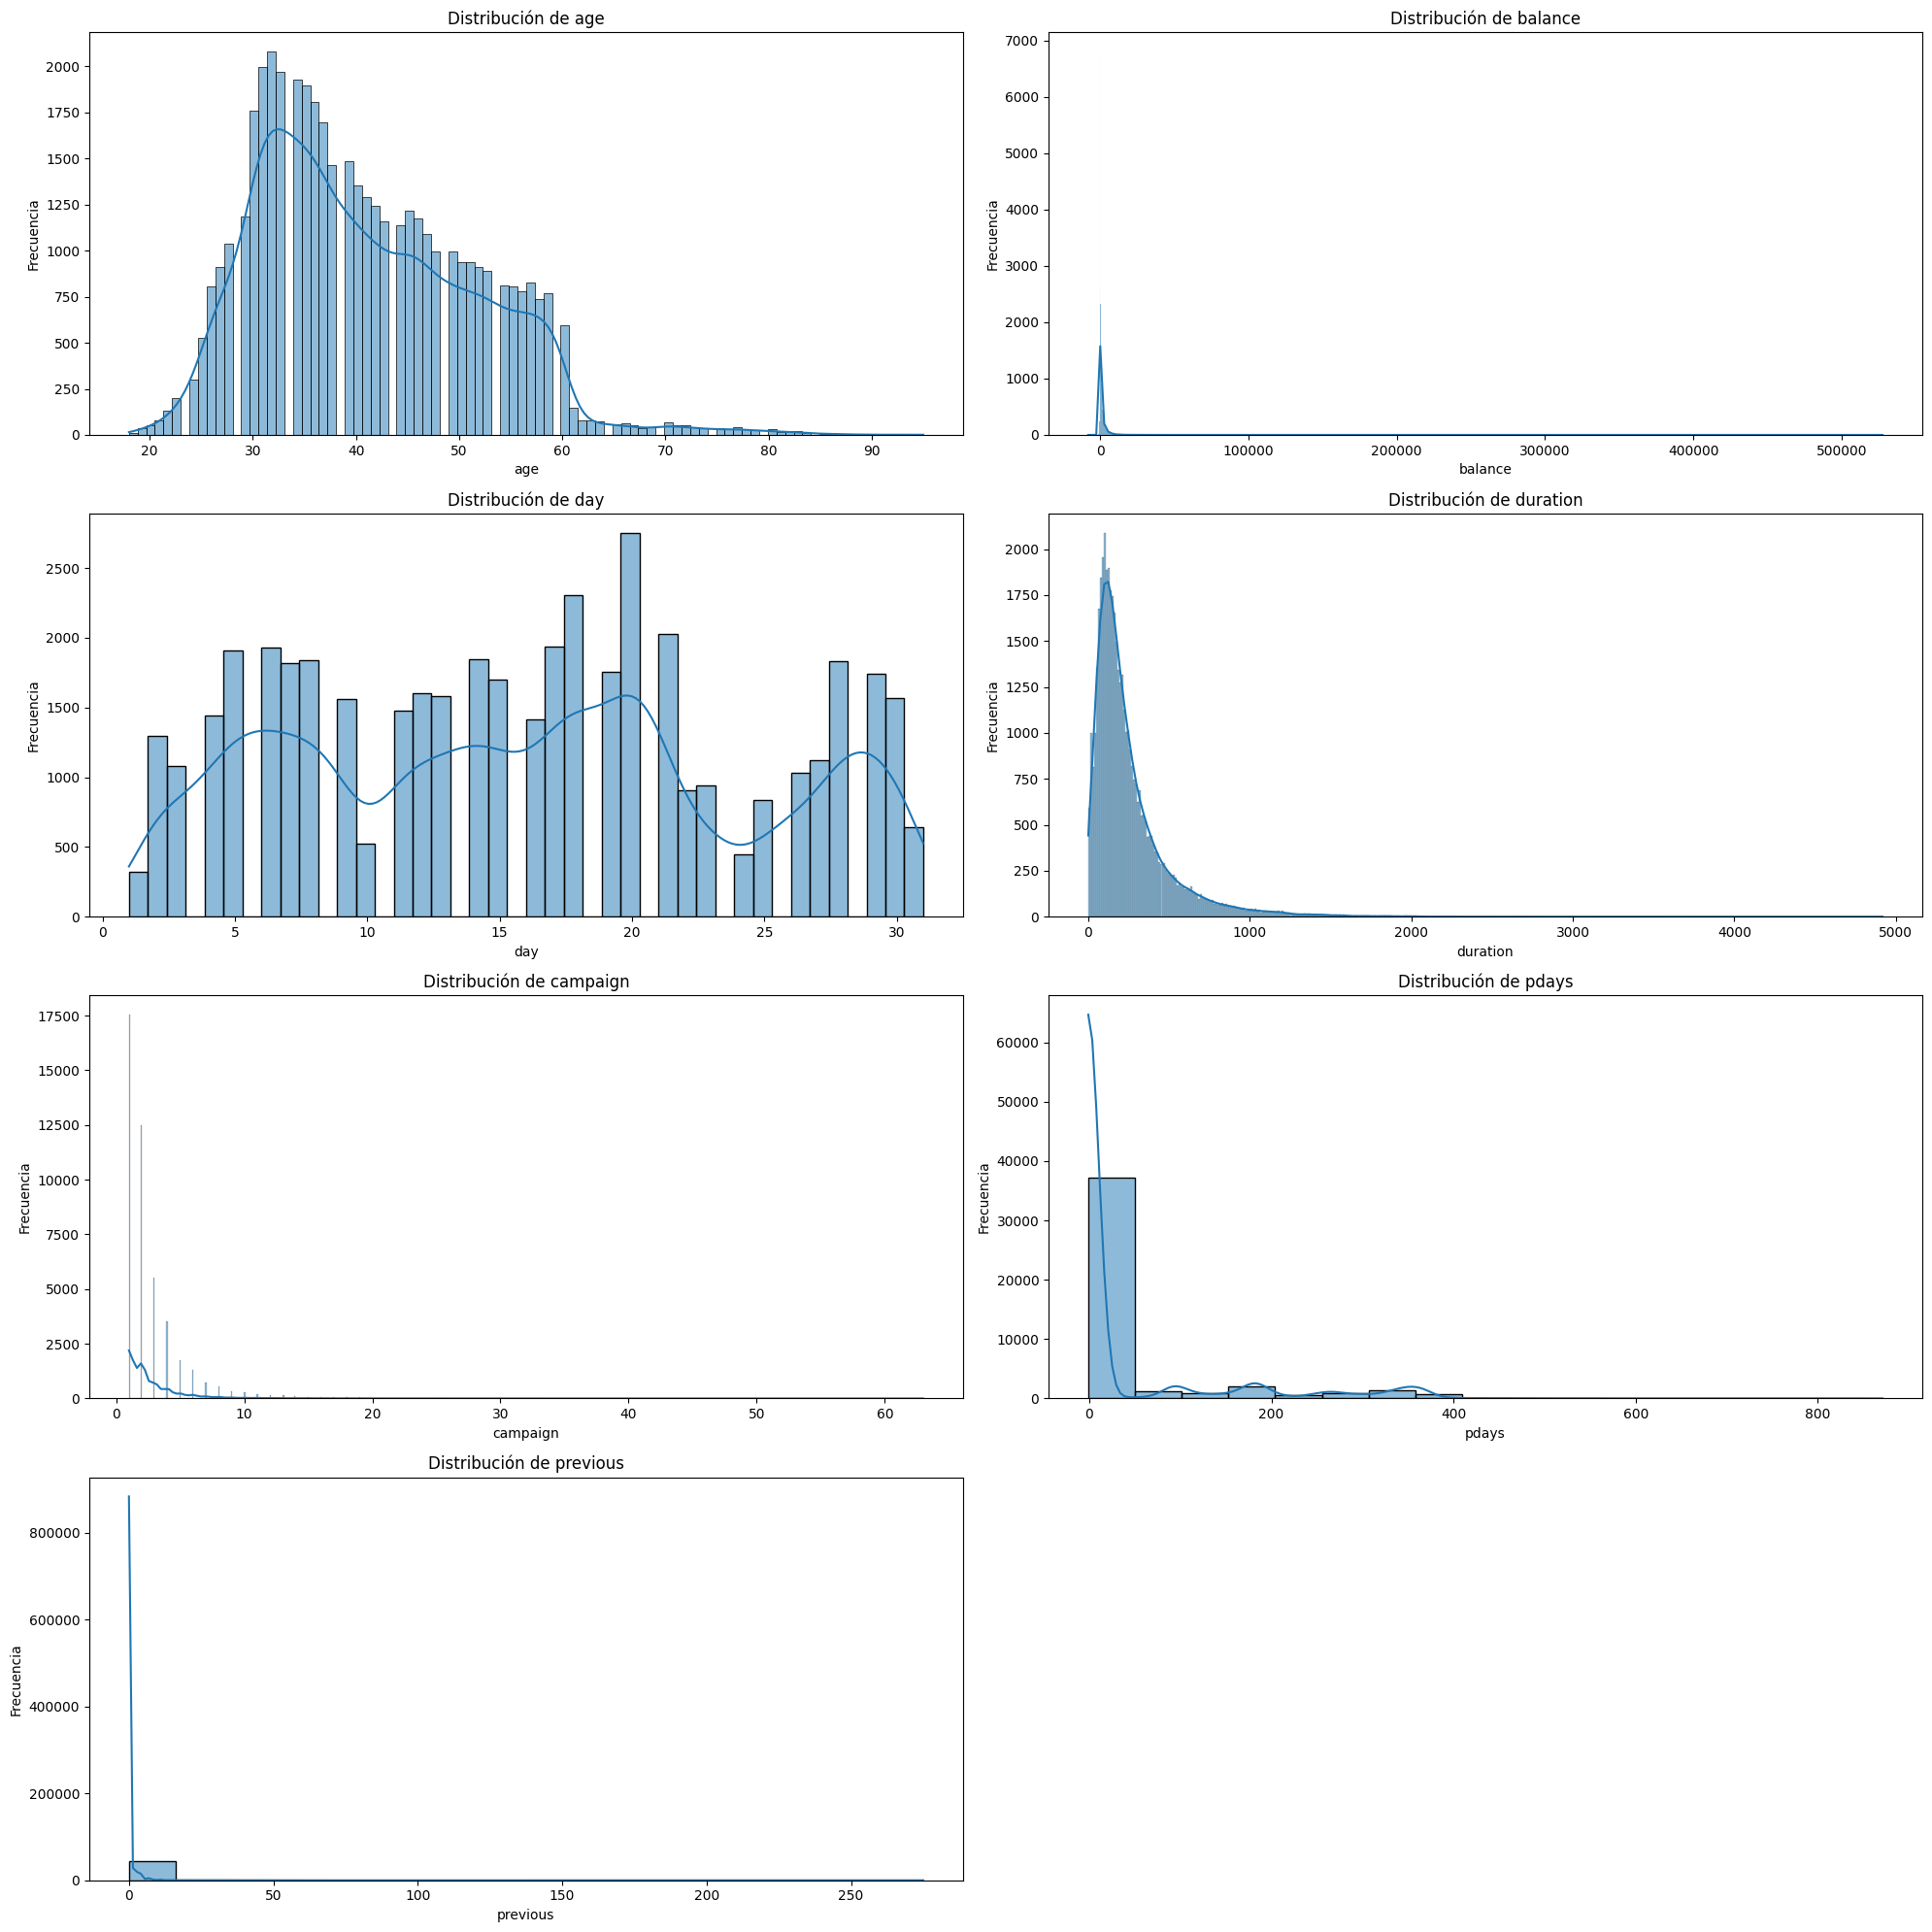

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suponiendo que 'data' es tu DataFrame
# Identificar columnas con datos numéricos
columnas_numericas = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular dimensiones de la cuadrícula
n_vars = len(columnas_numericas)
n_cols = 2  # Ajustar el número de columnas para un formato visual adecuado
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcular número de filas necesarias

# Configurar la figura para múltiples subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Aplanar el array de axes para un fácil acceso

# Crear Histogramas y Gráficos de Densidad para cada Variable Numérica
for ax, columna in zip(axes, columnas_numericas):
    sns.histplot(data[columna].dropna(), ax=ax, kde=True)  # Combinar histograma con KDE
    ax.set_title(f'Distribución de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots extras si los hay
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Análisis bivariado

In [28]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,NaN,5,may,261.0,1,-1.0,0,NaN,no
1,44.0,technician,single,secondary,no,29.0,yes,no,NaN,5,may,151.0,1,-1.0,0,NaN,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,5,may,76.0,1,-1.0,0,NaN,no
3,47.0,blue-collar,married,NaN,no,1506.0,yes,no,NaN,5,may,92.0,1,-1.0,0,NaN,no
4,33.0,NaN,single,NaN,no,1.0,no,no,NaN,5,may,198.0,1,-1.0,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,51.0,technician,married,tertiary,no,825.0,no,no,telephone,17,nov,977.0,3,-1.0,0,NaN,yes
45203,71.0,retired,divorced,primary,no,1729.0,no,no,telephone,17,nov,456.0,2,-1.0,0,NaN,yes
45204,72.0,retired,married,secondary,no,5715.0,no,no,telephone,17,nov,1127.0,5,184.0,3,success,yes
45205,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,NaN,no


C:\Users\josan\AppData\Local\Temp\ipykernel_31620\836788026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


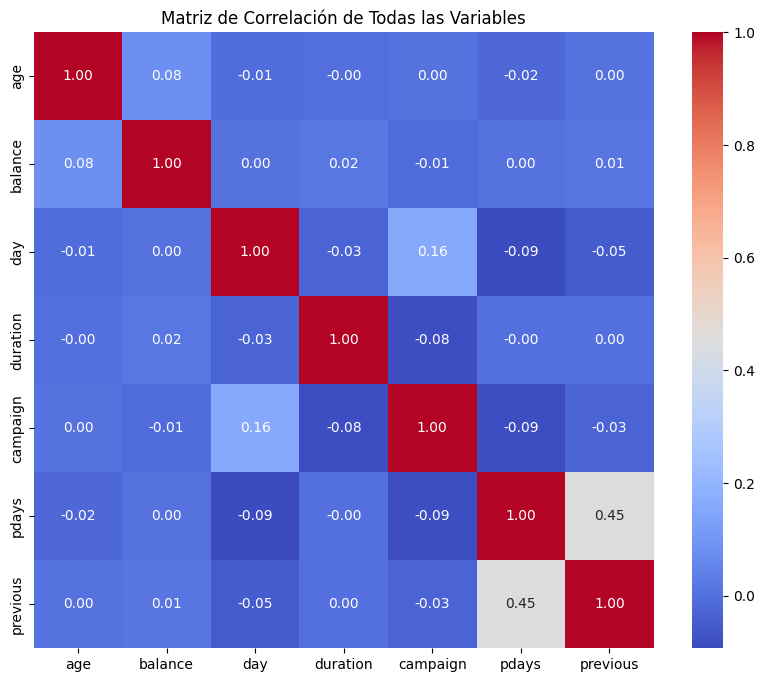

In [29]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación de Todas las Variables")
plt.show()

In [30]:
# Realizamos label encoding de nuestras variables categoricas para poder calcular su correlación respecto al resto.

from sklearn.preprocessing import LabelEncoder

label_mappings={}

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Asumiendo que sólo quieres codificar datos categóricos
        data[column] = le.fit_transform(data[column])
        # Almacenar las clases y sus etiquetas correspondientes
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))



In [31]:
# Como podemos ver, el resultado del label encoding previo es:

print("\nAsignaciones de Label Encoder para cada columna:")
for column, mappings in label_mappings.items():
    print(f"{column}: {mappings}")


Asignaciones de Label Encoder para cada columna:
job: {'administrative': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, nan: 11}
marital: {'divorced': 0, 'married': 1, 'single': 2}
education: {'primary': 0, 'secondary': 1, 'tertiary': 2, nan: 3}
default: {'no': 0, 'yes': 1}
housing: {'no': 0, 'yes': 1}
loan: {'no': 0, 'yes': 1}
contact: {'mobile phone': 0, 'telephone': 1, nan: 2}
month: {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
poutcome: {'failure': 0, 'other': 1, 'success': 2, nan: 3}
y: {'no': 0, 'yes': 1}


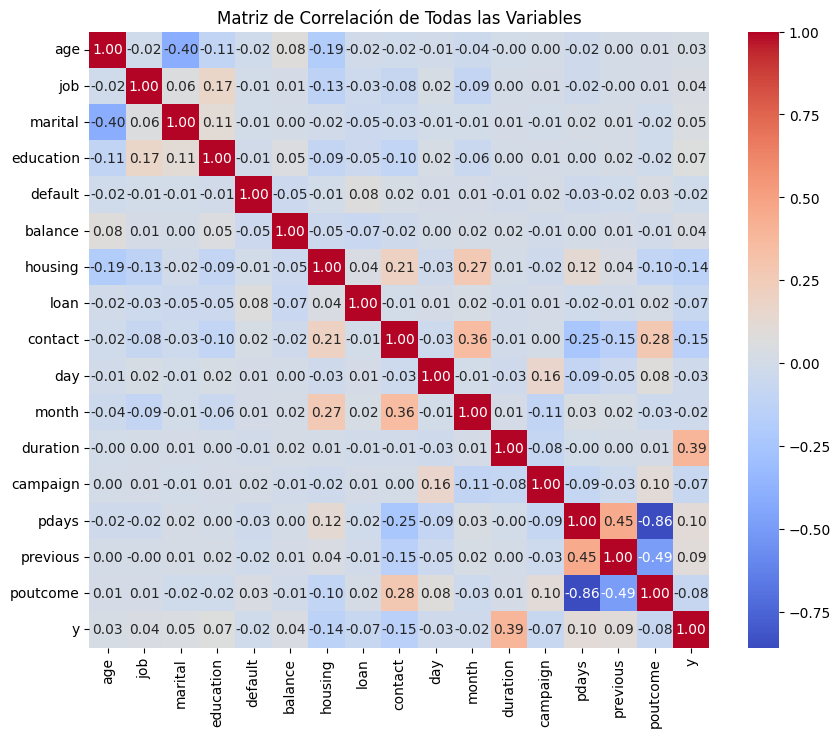

In [32]:
# Ahora si podemos calcular la matriz de correlación

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación de Todas las Variables")
plt.show()


# Conclusiones

In [33]:
## A completar

